In [207]:
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#matplotlib 显示中文
matplotlib.rcParams['font.sans-serif']=['STHeiti']



In [208]:
#加载数据
df = pd.read_csv("./data.csv",encoding = 'GB2312')

In [209]:
#查看数据
df.head()

,地区,区域划分,三大地带,食品烟酒,衣着,居住,生活用品及服务,交通通信,教育文化娱乐,医疗保健,其他用品及服务,2017年消费支出,2018年消费支出
0,北京,华北,东部地带,7548.9,2238.3,12295.0,2492.4,5034.0,3916.7,2899.7,1000.4,37425.4,39842.7
1,天津,华北,东部地带,8647.0,1944.8,5922.4,1655.5,3744.5,2691.5,2390.0,845.6,27841.3,29902.9
2,河北,华北,东部地带,3912.8,1173.5,3679.4,1066.2,2290.3,1578.3,1396.3,340.1,15436.9,16722.0
3,山西,华北,中部地带,3324.8,1206.0,2933.5,761.0,1884.0,1879.3,1359.7,316.1,13664.4,14810.1
4,内蒙古,华北,西部地带,5205.3,1866.2,3324.0,1199.9,2914.9,2227.8,1653.8,553.8,18945.7,19665.2


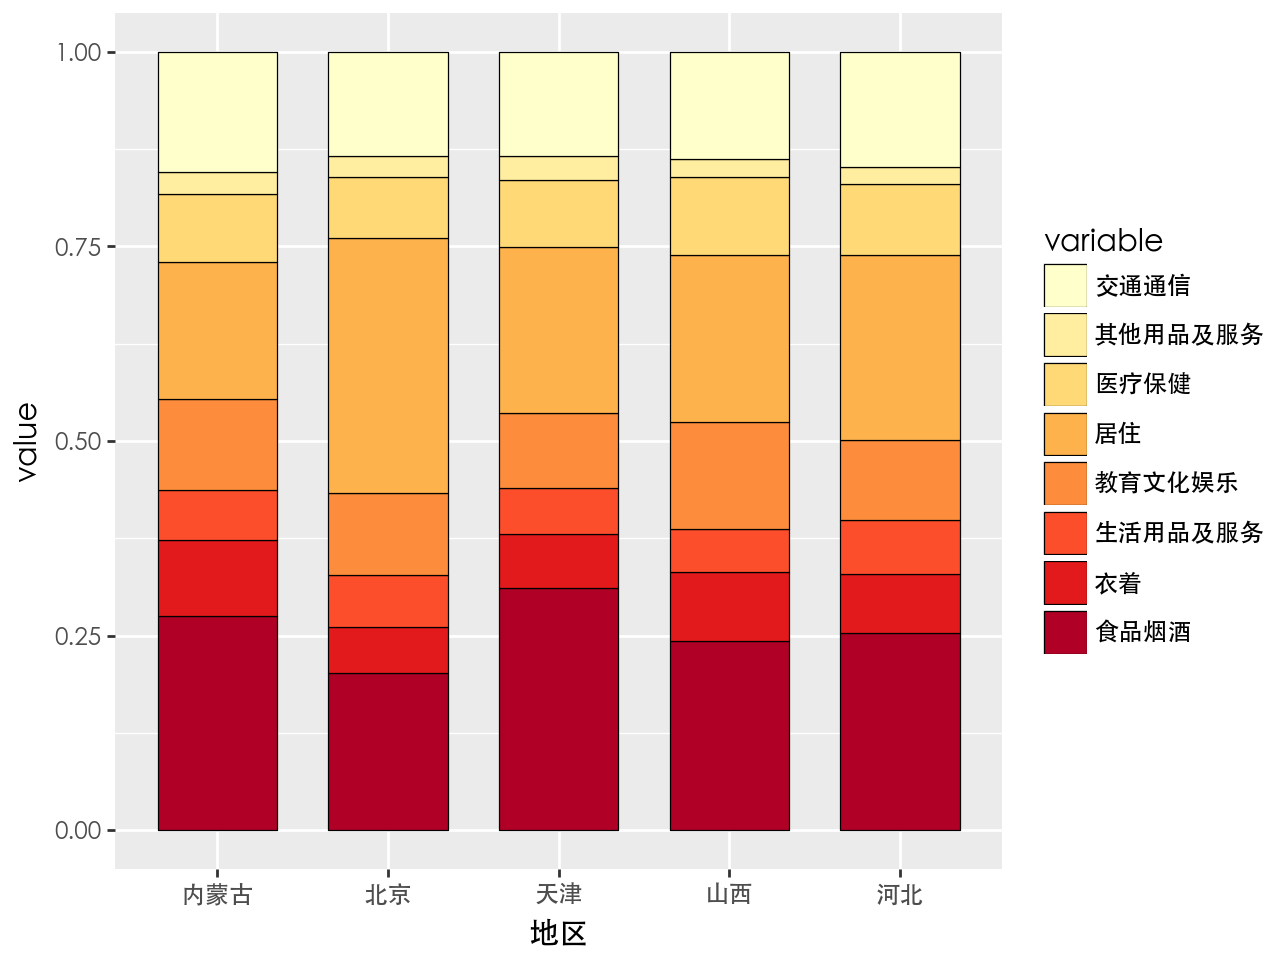

In [210]:
# 1. 绘制华北区域各个地区（北京、天津、河北、山西、内蒙古）的 8 项人均消费支出的百分比堆积柱状图
#筛选地区
data1 = df[df['地区'].isin(['北京', '天津', '河北', '山西', '内蒙古'])]
#选取需要的列
data1_plt = data1[['地区','食品烟酒', '衣着', '居住', '生活用品及服务', '交通通信', '教育文化娱乐', '医疗保健', '其他用品及服务']]
#计算百分比
Sum_df = data1_plt.iloc[:,1:].apply(lambda x: x.sum(), axis=1)
data1_plt.iloc[:,1:] = data1_plt.iloc[:,1:].apply(lambda x: x/Sum_df, axis=0)

data_plt = pd.melt(data1_plt, id_vars='地区')
(
    ggplot(data_plt, aes(x='地区', y='value', fill='variable'))
    + geom_bar(stat='identity', color='k', position='stack', width=0.7, size=0.25)
    + scale_fill_brewer(palette='YlOrRd')
    + theme(text = element_text(family = "STHeiti"))

)

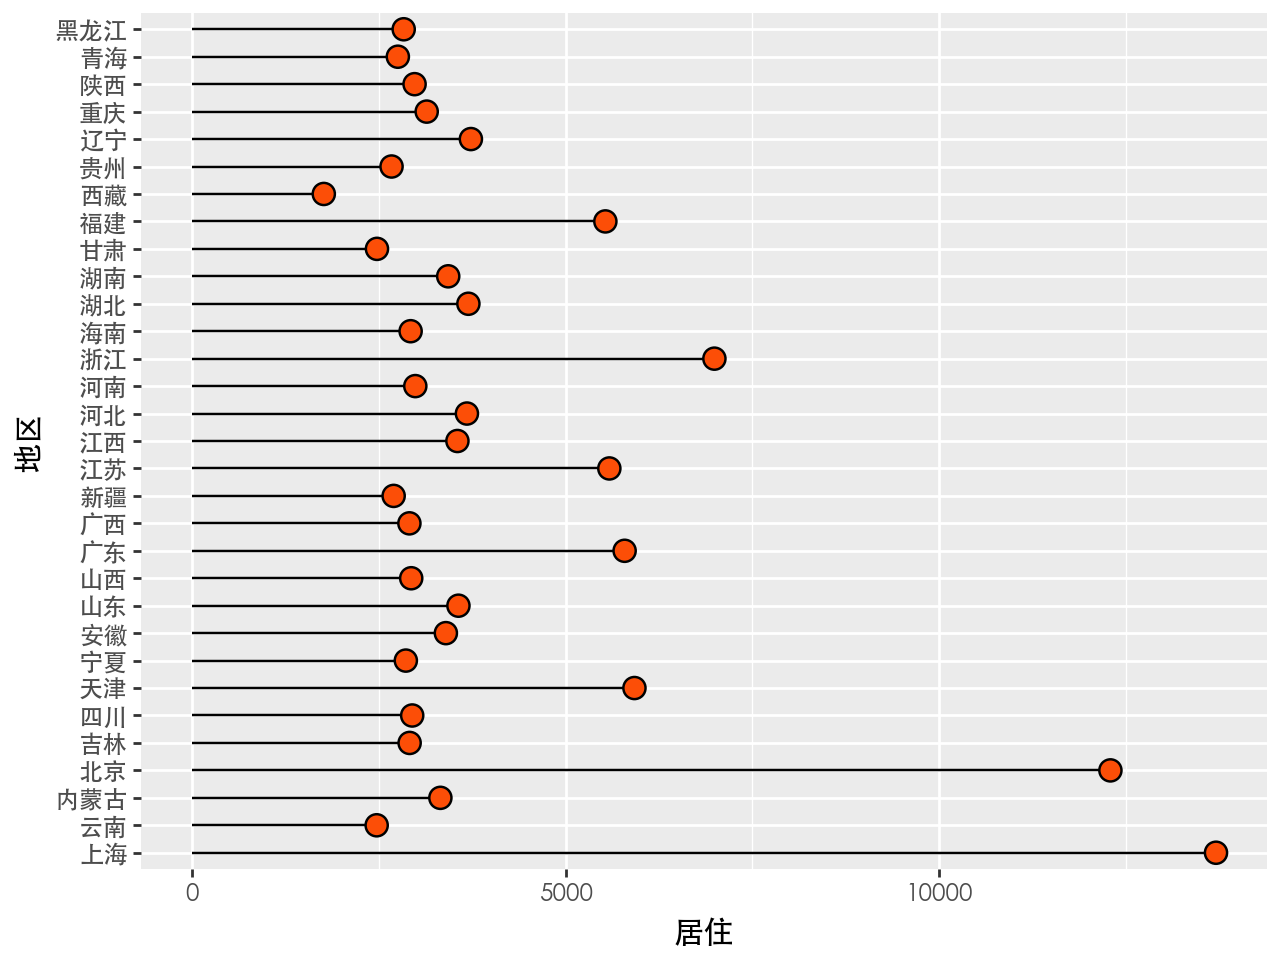

In [211]:
#2.绘制31个地区居住消费的棒棒糖图。
(
    ggplot(df, aes('居住', '地区'))
    + geom_segment(aes(x=0, xend='居住', y='地区', yend='地区'))
    + geom_point(shape='o', size=4, color='k', fill='#FC4E07')
    + theme(text = element_text(family = "STHeiti"))
)

/var/folders/zl/0v5yd0415g11fyrgrh6q4vh40000gn/T/ipykernel_14655/775146772.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


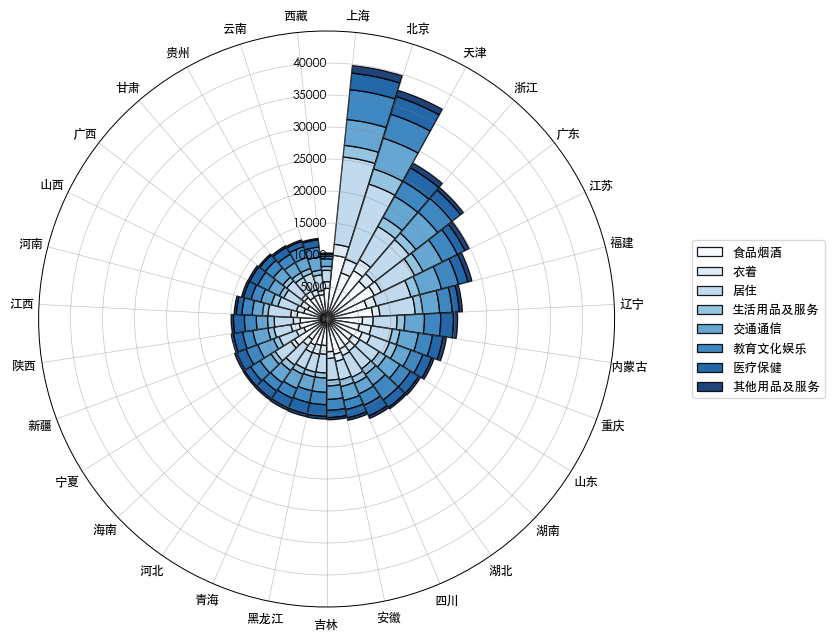

In [212]:
#3. 绘制 31 个地区 8 项人均消费支出的南丁格尔玫瑰图。
from matplotlib import cm, colors
from matplotlib.pyplot import figure, show, rc


mydata = df[['地区', '食品烟酒', '衣着', '居住', '生活用品及服务', '交通通信', '教育文化娱乐', '医疗保健', '其他用品及服务']]
mydata['sum'] = mydata.iloc[:, 1:].sum(axis=1)
mydata = mydata.sort_values(by='sum', ascending=False)     #总和从大到小排序

n_row = mydata.shape[0]  # 地区数量
n_col = mydata.shape[1]-2  # 消费支出类别数量

# 计算角度
angle = np.arange(0, 2*np.pi, 2*np.pi/n_row)

# 半径数组
radius = mydata.iloc[:, 1:9].values

cmap = cm.get_cmap('Blues', n_col) #获取颜色主题Reds的Hex颜色编码
color = [colors.rgb2hex(cmap(i)[:8]) for i in range(cmap.N)]
# 绘制堆叠条形图
fig = figure(figsize=(8, 8), dpi=90)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_offset(np.pi/2 - np.pi/n_row)
ax.set_theta_direction(-1)
ax.set_rlabel_position(360-180/n_row)
p = [ f"p{i}" for i in range(n_col)]

bottom = radius[:, 0]*0
for i in range(n_col):
    p[i]= plt.bar(angle, radius[:, i], color=color[i], edgecolor='k', width=0.2, bottom=bottom, alpha=0.9, align = 'edge', label=mydata.columns[i + 1])
    bottom += radius[:, i]  # 更新底部
    
plt.legend(loc='center', bbox_to_anchor=(1.25, 0, 0, 1))
plt.xticks(angle, labels=mydata['地区']) #X轴标签
plt.ylim(0, 45000)
plt.yticks(np.arange(0, 45000, 5000), verticalalignment='center', horizontalalignment='right')#horizontalalignment='right',右侧与90度垂直线对齐
plt.grid(which='major', axis='x', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.show()


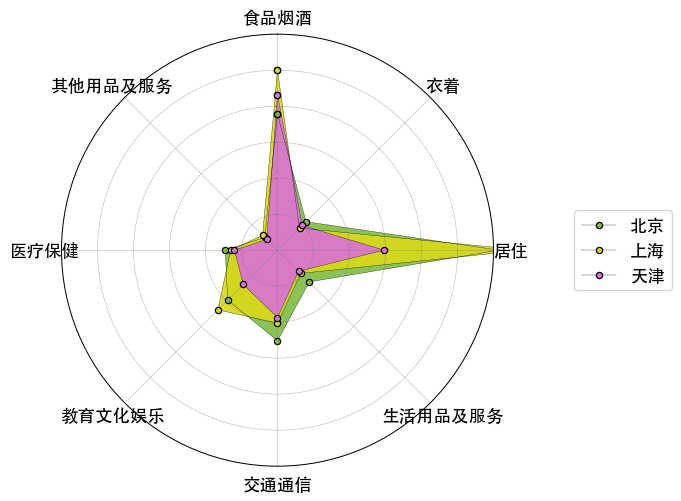

In [213]:
#4. 绘制北京、天津和上海 8 项消费支出的雷达图。
data2 = df[df['地区'].isin(['北京', '天津', '上海'])]
data2_plt = data2[['地区','食品烟酒', '衣着', '居住', '生活用品及服务', '交通通信', '教育文化娱乐', '医疗保健', '其他用品及服务']]
a = np.array(data2_plt.iloc[:,1:])
df_new = pd.DataFrame(dict(categories=['var1', 'var2', 'var3', 'var4', 'var5','var6', 'var7', 'var8'], groupA= a[0], groupB= a[1],groupC= a[2]))
N = df_new.shape[0]
angles = [n/float(N)*2*np.pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(8, 8), dpi=90)
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

plt.xticks(angles[:-1], labels=data2_plt.columns[1:], color='k', size=14)
plt.ylim(0, 12000)
plt.yticks(np.arange(0, 12000, 2000), color='k', size=1, verticalalignment='center', horizontalalignment='right')
#horizontalalignment='right',右侧与90度垂直线对齐
plt.grid(which='major', axis='x', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)

values=df_new['groupA'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#7FBC41', alpha=0.9)
ax.plot(angles, values, marker='o', markerfacecolor='#7FBC41', markersize=5, color='k', linewidth=0.25, label='北京')

values=df_new['groupC'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#D9D919', alpha=0.9)
ax.plot(angles, values, marker='o', markerfacecolor='#D9D919', markersize=5, color='k', linewidth=0.25, label='上海')


values=df_new['groupB'].values.flatten().tolist()

values += values[:1]
ax.fill(angles, values, '#DB70DB', alpha=0.9)
ax.plot(angles, values, marker='o', markerfacecolor='#DB70DB', markersize=5, color='k', linewidth=0.25, label='天津')


plt.legend(loc='center', bbox_to_anchor=(1.25, 0, 0.1, 1),fontsize=14)
plt.show()

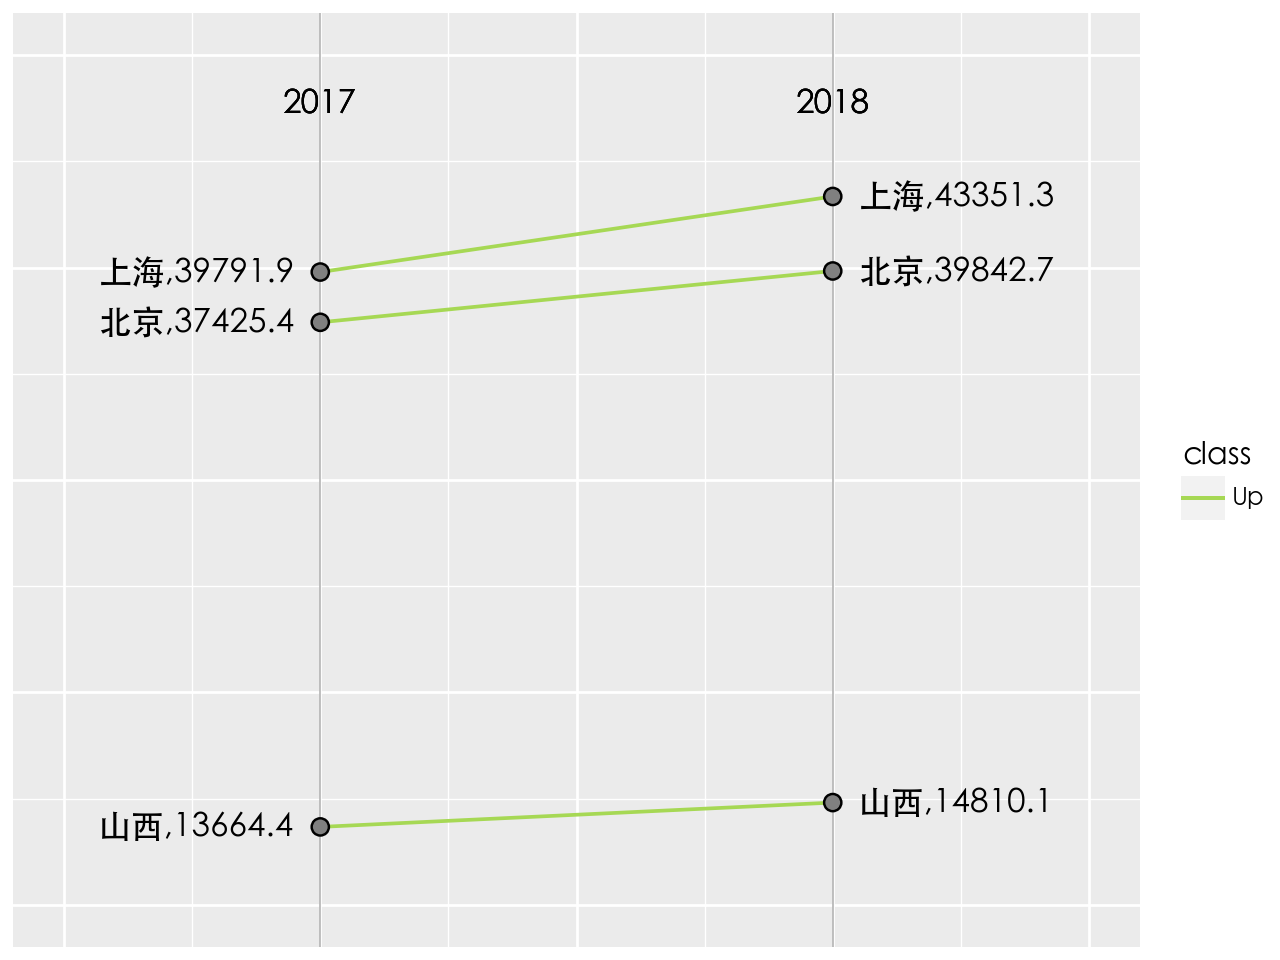

In [214]:
#5.绘制北京、山西、上海 2017 年到 2018 年总体人均消费支出的坡度图
df_1 = df[df['地区'].isin(['北京', '山西', '上海'])]
df_poudu = df_1[['地区','2017年消费支出','2018年消费支出']].reset_index(drop=True)

left_label = df_poudu.apply(lambda x: x['地区'] + ',' + str(x['2017年消费支出']), axis=1)
right_label = df_poudu.apply(lambda x: x['地区'] + ',' + str(x['2018年消费支出']), axis=1)

df_poudu['class'] = df_poudu.apply(lambda x: 'red' if x['2018年消费支出']-x['2017年消费支出']<0 else 'green', axis=1)


(
    ggplot(df_poudu)
    + geom_segment(aes(x=1, xend=2, y='2017年消费支出', yend='2018年消费支出', color='class'), size=.75) #连接线
    + geom_vline(xintercept=1, linetype='solid', size=.1) 
    + geom_vline(xintercept=2, linetype='solid', size=.1) 
    + geom_point(aes(x=1, y='2017年消费支出'), size=3, shape='o', fill='grey', color='k')
    + geom_point(aes(x=2, y='2018年消费支出'), size=3, shape='o', fill='grey', color='k')
    + scale_color_manual(labels=('Up', 'Down'), values=('#A6D854', '#FC4E07'))
    + xlim(.5, 2.5)
    + ylim(10000, 50000)
    + geom_text(label=left_label, y=df_poudu['2017年消费支出'], x=0.95, size=12, ha='right')
    + geom_text(label=right_label, y=df_poudu['2018年消费支出'], x=2.05, size=12, ha='left')
    + geom_text(label='2017', x=1, y=1.1*(np.max(np.max(df_poudu[['2017年消费支出', '2018年消费支出']]))), size=12)
    + geom_text(label='2018', x=2, y=1.1*(np.max(np.max(df_poudu[['2017年消费支出', '2018年消费支出']]))), size=12)
    + theme(
        text=element_text(family="STHeiti"),
        axis_title_x=element_blank(),  # 隐藏x轴标题
        axis_title_y=element_blank(),  # 隐藏y轴标题
        axis_text_x=element_blank(),   # 隐藏x轴刻度标签
        axis_text_y=element_blank(),   # 隐藏y轴刻度标签
        axis_ticks=element_blank()     # 隐藏x轴和y轴的刻度线
    )
    
    
)